In [1]:
# Installing Dependencies

!pip install pycountry_convert
!pip install folium
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
!pip install keras
!pip install tensorflow
!pip install --upgrade pip

--2020-04-03 14:49:45--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111008 (108K) [application/octet-stream]
Saving to: ‘model_deaths.h5’

model_deaths.h5     100%[===================>] 108.41K  --.-KB/s    in 0.005s  

2020-04-03 14:49:45 (21.6 MB/s) - ‘model_deaths.h5’ saved [111008/111008]

--2020-04-03 14:49:45--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111008 (108K) [applica

In [2]:
#!pip install tensorflow
!conda install tensorflow --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
!pip install imgkit

In [4]:
!pip install wkhtmltopdf

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from datetime import datetime,timedelta, date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
from pandas.plotting import table

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop,Adam
import imgkit


%matplotlib inline

Using TensorFlow backend.


In [6]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [7]:
df_covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Australia,2020-04-03 14:42:30,-25.0000,133.0000,5330,28,649,4653
1,Austria,2020-04-03 14:35:26,47.5162,14.5501,11412,168,2022,9222
2,Canada,2020-04-03 14:42:16,60.0010,-95.0010,11284,139,1971,0
3,China,2020-04-03 09:35:41,30.5928,114.3055,82509,3326,76760,2423
4,Denmark,2020-04-03 14:35:26,56.0000,10.0000,3861,139,1287,2435


In [8]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


In [9]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,2,4,4,4,4,4,4,4,6
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,5,5,6,8,10,10,11,15,15,16
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,19,21,25,26,29,31,35,44,58,86
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,3,3,3,6,8,12,14,15
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2


In [10]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,2,2,2,2,2,2,5,5,10
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,10,17,17,31,31,33,44,52,67,76
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,24,65,29,29,31,31,37,46,61,61
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,10,10,10,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [11]:
df_confirmed = df_confirmed.rename(columns={'Province/State':'state','Country/Region':'country'})
df_deaths = df_deaths.rename(columns={'Province/State':'state','Country/Region':'country'})
df_recovered = df_recovered.rename(columns={'Province/State':'state','Country/Region':'country'})
df_covid19 = df_covid19.rename(columns={'Country_Region':'country'})
df_covid19['Active'] = df_covid19['Confirmed'] - df_covid19['Recovered'] - df_covid19['Deaths']

In [12]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"
df_recovered.loc[df_recovered['country'] == "US", "country"] = "USA"


df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"
df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"
df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"
df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"
df_recovered.loc[df_recovered['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"
df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"
df_recovered.loc[df_recovered['country'] == 'Bahamas, The', "country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"
df_recovered.loc[df_recovered['country'] == 'Gambia, The', "country"] = 'Gambia'

# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [13]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_confirmed = df_confirmed.drop(['state'],axis=1)
df_confirmed.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


In [14]:

df_deaths = df_deaths.replace(np.nan, '', regex=True)
df_deaths = df_deaths.drop(['state'],axis=1)
df_deaths.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1,2,4,4,4,4,4,4,4,6
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,5,5,6,8,10,10,11,15,15,16
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,19,21,25,26,29,31,35,44,58,86
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,3,3,3,6,8,12,14,15
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2


In [15]:
df_recovered = df_recovered.replace(np.nan, '', regex=True)
df_recovered = df_recovered.drop(['state'],axis=1)
df_recovered.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,5,5,10
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,10,17,17,31,31,33,44,52,67,76
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,24,65,29,29,31,31,37,46,61,61
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,1,1,1,1,10,10,10,10
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [16]:
df_table = df_table.replace(np.nan, '', regex=True)
df_table.head()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered
0,Afghanistan,2020-01-22,0,0,,,0,
1,Afghanistan,2020-01-23,0,0,,,0,
2,Afghanistan,2020-01-24,0,0,,,0,
3,Afghanistan,2020-01-25,0,0,,,0,
4,Afghanistan,2020-01-26,0,0,,,0,


In [17]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis=1)

In [18]:
df_countries_cases.head()

,country,Confirmed,Deaths,Recovered,Active
0,Australia,5330,28,649,4653
1,Austria,11412,168,2022,9222
2,Canada,11284,139,1971,9174
3,China,82509,3326,76760,2423
4,Denmark,3861,139,1287,2435


In [19]:
df_countries_cases.index = df_countries_cases['country']
df_countries_cases = df_countries_cases.drop(['country'],axis=1)
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active
country,,,,
Australia,5330,28,649,4653
Austria,11412,168,2022,9222
Canada,11284,139,1971,9174
China,82509,3326,76760,2423
Denmark,3861,139,1287,2435


In [20]:
df_countries_cases = df_countries_cases.groupby(['country']).sum()

In [21]:
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active
country,,,,
Afghanistan,273,6,10,257
Albania,304,16,89,199
Algeria,986,86,61,839
Andorra,439,16,16,407
Angola,8,2,1,5


In [22]:
df_countries_cases['Mortality_Rate(per100)'] = np.round(100 * df_countries_cases['Deaths']/df_countries_cases['Confirmed'],2)

In [23]:
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
country,,,,,
Afghanistan,273,6,10,257,2.20
Albania,304,16,89,199,5.26
Algeria,986,86,61,839,8.72
Andorra,439,16,16,407,3.64
Angola,8,2,1,5,25.00


In [24]:
df_countries_cases.sort_values('Confirmed',ascending=False,inplace=True)

In [25]:
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
country,,,,,
USA,245658,6069,9311,230278,2.47
Spain,117710,10935,30513,76262,9.29
Italy,115242,13915,18278,83049,12.07
Germany,87244,1138,24575,61531,1.30
China,82509,3326,76760,2423,4.03


In [43]:
df_total_world = pd.DataFrame(df_countries_cases.sum()).transpose().style.background_gradient(cmap='prism',axis=1)
df_total_world

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
0,1.04113e+06,55132,221262,764732,631.59


In [45]:
df_total_world.to_excel('World_Total_COVID19_data.xlsx',engine='openpyxl')

In [27]:
df_countries = df_countries_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality_Rate(per100)"])

In [28]:
df_countries

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
country,,,,,
USA,245658,6069,9311,230278,2.47
Spain,117710,10935,30513,76262,9.29
Italy,115242,13915,18278,83049,12.07
Germany,87244,1138,24575,61531,1.3
China,82509,3326,76760,2423,4.03
France,59929,5398,12548,41983,9.01
Iran,53183,3294,17935,31954,6.19
United Kingdom,38681,3611,205,34865,9.34
Switzerland,19303,573,4846,13884,2.97


In [29]:
df_countries.to_excel('World_COVID19_data.xlsx',engine='openpyxl')

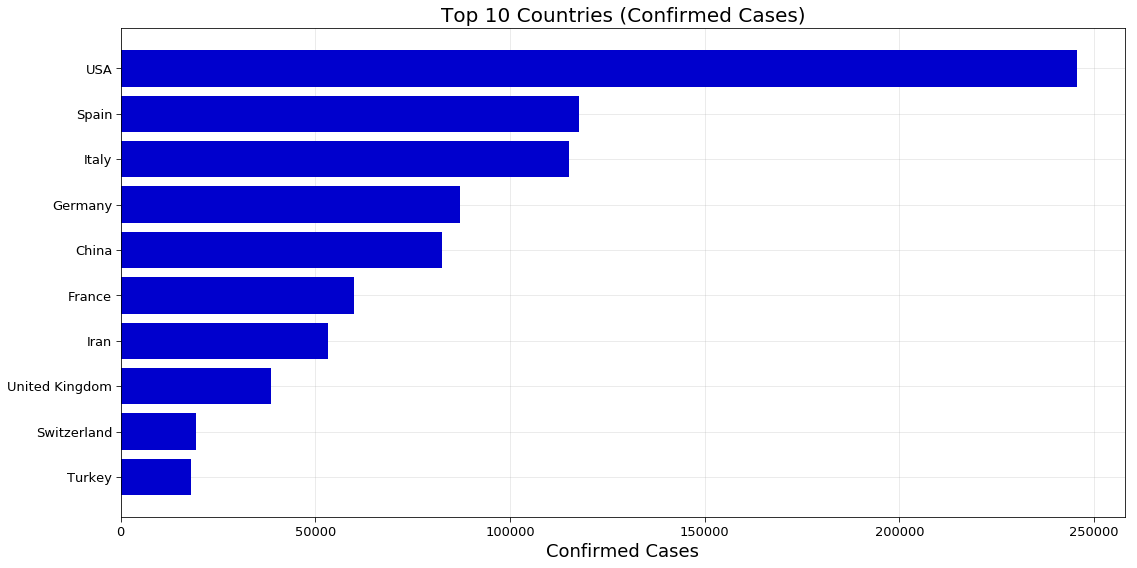

In [30]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="mediumblue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

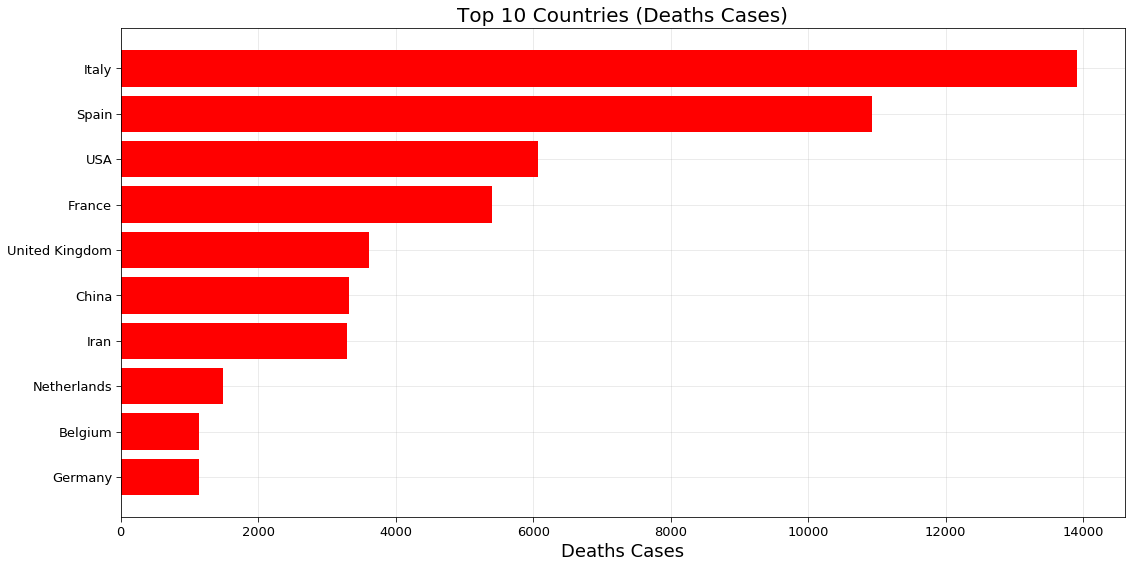

In [31]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Deaths Cases).png')

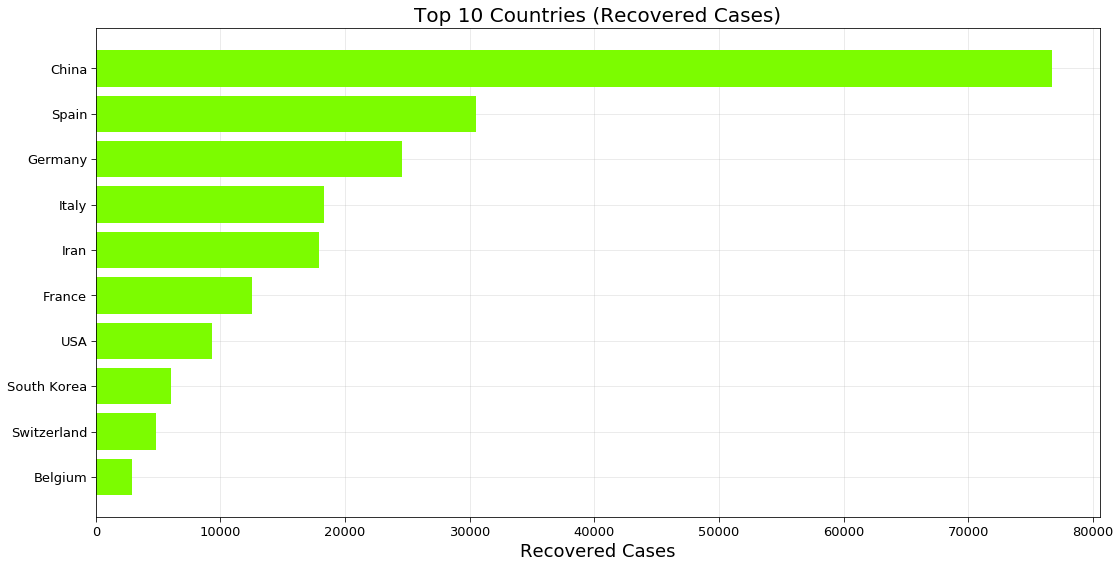

In [32]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="lawngreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Recovered Cases).png')

In [33]:
df_countries_cases.corr().style.background_gradient(cmap='OrRd')

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
Confirmed,1,0.78879,0.585574,0.958594,0.0831344
Deaths,0.78879,1,0.550333,0.698032,0.178258
Recovered,0.585574,0.550333,1,0.333425,0.0645104
Active,0.958594,0.698032,0.333425,1,0.0659166
Mortality_Rate(per100),0.0831344,0.178258,0.0645104,0.0659166,1


In [34]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

In [35]:
df_countries = df_confirmed.groupby(['country']).sum()

In [36]:
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending=False)

In [37]:
countries = df_countries[df_countries[df_countries.columns[-1]] >= 1000].index

In [38]:
countries

Index(['USA', 'Italy', 'Spain', 'Germany', 'China', 'France', 'Iran',
       'United Kingdom', 'Switzerland', 'Turkey', 'Belgium', 'Netherlands',
       'Canada', 'Austria', 'South Korea', 'Portugal', 'Brazil', 'Israel',
       'Sweden', 'Norway', 'Australia', 'Czechia', 'Ireland', 'Denmark',
       'Russia', 'Chile', 'Ecuador', 'Malaysia', 'Poland', 'Romania',
       'Philippines', 'India', 'Japan', 'Luxembourg', 'Pakistan',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Greece', 'Finland',
       'South Africa', 'Peru', 'Dominican Republic', 'Mexico', 'Iceland',
       'Panama', 'Serbia', 'Colombia', 'Argentina', 'Singapore',
       'United Arab Emirates', 'Croatia'],
      dtype='object', name='country')

In [39]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

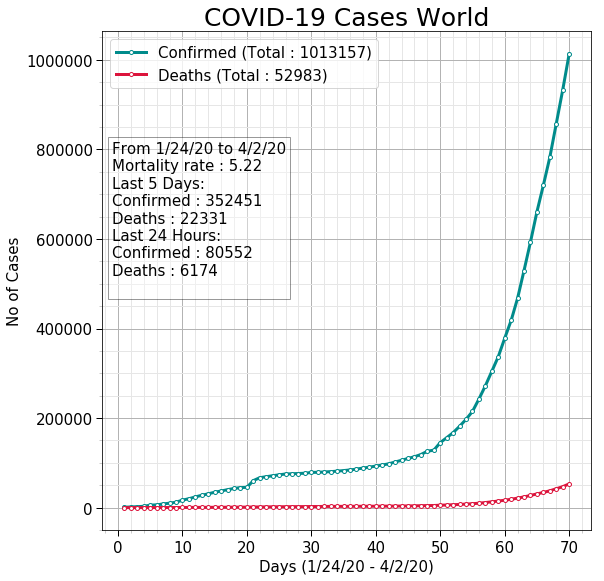

In [40]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))
visualize_covid_cases(df_confirmed, df_deaths,country = "All",figure = [f,rows,cols, 1])

plt.savefig('COIVD-19-World.png')
plt.show()

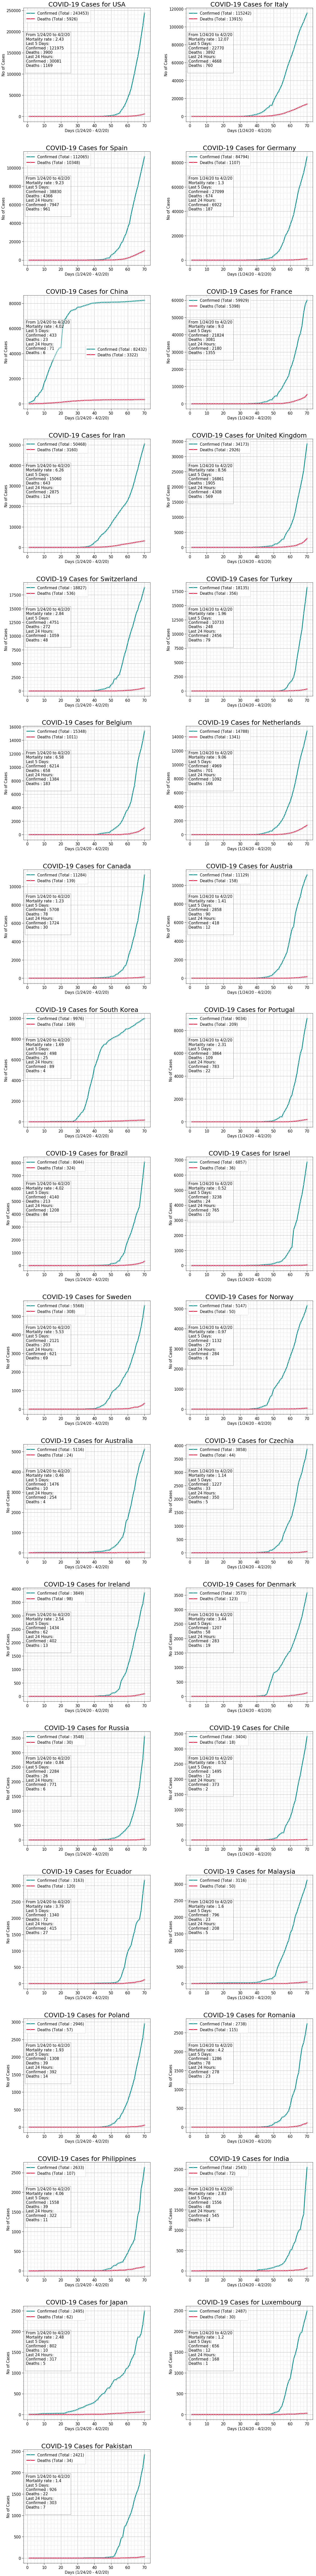

<Figure size 432x288 with 0 Axes>

In [41]:
df_countries = df_countries.groupby(['country']).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending=False)
countries = df_countries[df_countries[df_countries.columns[-1]]>=2000].index
cols = 2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(20,8*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed,df_deaths,country=country,figure=[f,rows,cols,i+1])
    
plt.show()

plt.savefig("Top 25 countries latest trends")

# COVID19 -  INDIA DATA ANALYSIS

In [46]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()

In [47]:
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [48]:
df_india = df_india.sort_values('confirmed',ascending=False)
df_india = df_india[['confirmed','active','recovered','deaths']]
df_india

,confirmed,active,recovered,deaths
state,,,,
Maharashtra,423,360,42,21
Tamil Nadu,411,404,6,1
Delhi,384,372,8,4
Kerala,295,251,42,2
Uttar Pradesh,172,153,17,2
Rajasthan,168,165,3,0
Andhra Pradesh,161,158,2,1
Telangana,154,128,17,9
Madhya Pradesh,129,121,0,8


In [49]:
total = df_india.sum()
total.name = "Total"

df_india_total = pd.DataFrame(total).transpose().style.background_gradient(cmap='prism',axis=1)
df_india_total

,confirmed,active,recovered,deaths
Total,2897,2616,206,75


In [50]:
df_india_total.to_excel('India_COVID19_totalData.xlsx',engine='openpyxl')

In [51]:
df_india['Mortality_Rate(per100)'] = np.round(100 * df_india['deaths']/df_india['confirmed'],2)

df_india.sort_values('confirmed',ascending=False,inplace=True)

df_india

,confirmed,active,recovered,deaths,Mortality_Rate(per100)
state,,,,,
Maharashtra,423,360,42,21,4.96
Tamil Nadu,411,404,6,1,0.24
Delhi,384,372,8,4,1.04
Kerala,295,251,42,2,0.68
Uttar Pradesh,172,153,17,2,1.16
Rajasthan,168,165,3,0,0.00
Andhra Pradesh,161,158,2,1,0.62
Telangana,154,128,17,9,5.84
Madhya Pradesh,129,121,0,8,6.20


In [52]:
df_india_styled = df_india.style.background_gradient('prism')
df_india_styled

df_india_styled = df_india.style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality_Rate(per100)"])


In [53]:
df_india_styled

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning:

invalid value encountered in less



,confirmed,active,recovered,deaths,Mortality_Rate(per100)
state,,,,,
Maharashtra,423,360,42,21,4.96
Tamil Nadu,411,404,6,1,0.24
Delhi,384,372,8,4,1.04
Kerala,295,251,42,2,0.68
Uttar Pradesh,172,153,17,2,1.16
Rajasthan,168,165,3,0,0
Andhra Pradesh,161,158,2,1,0.62
Telangana,154,128,17,9,5.84
Madhya Pradesh,129,121,0,8,6.2


In [54]:
df_india_styled.to_excel('India_COVID19_data.xlsx',engine='openpyxl')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning:

invalid value encountered in less



In [55]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
df_india["Lat"] = ""
df_india["Long"] = ""
for index in df_india.index :
    df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
    df_india.loc[df_india.index == index,"Long"] = locations[index][1]

In [66]:
url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States"
state_json = requests.get(url).json()
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=500,width="80%")
for i in range(0,len(df_india[df_india['confirmed']>0].index)):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        
        "<li>Mortality Rate:   "+str(np.round(df_india.iloc[i]['deaths']/(df_india.iloc[i]['confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(df_india.iloc[i]['confirmed']+1)))*15000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(india)

india

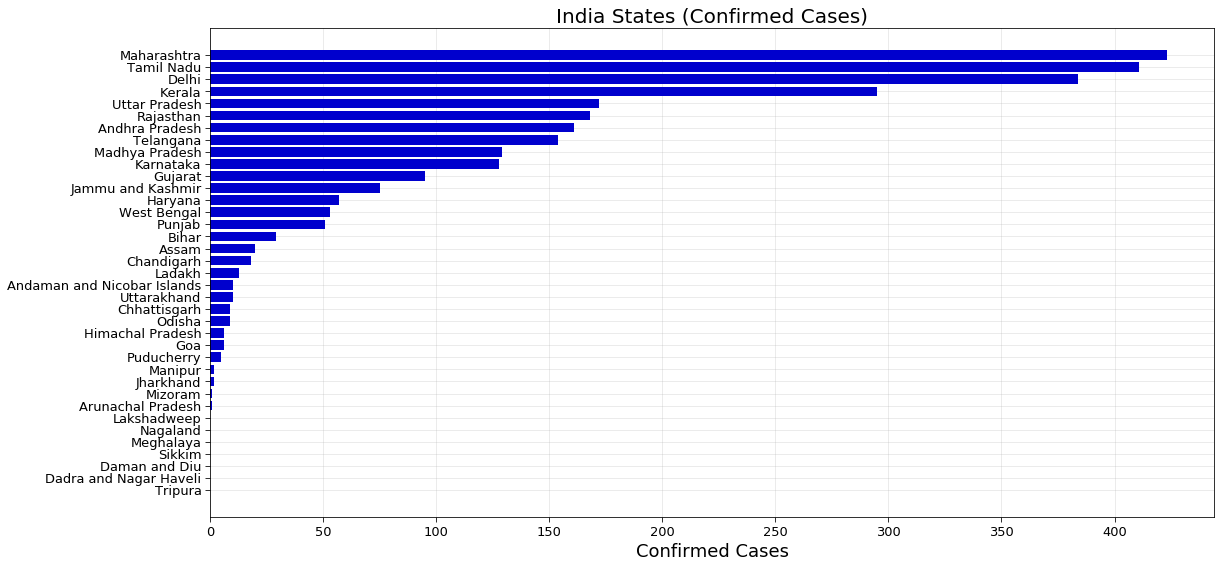

In [67]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('confirmed')["confirmed"].index[:],df_india.sort_values('confirmed')["confirmed"].values[:],color="mediumblue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("India States (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Confirmed Cases).png')

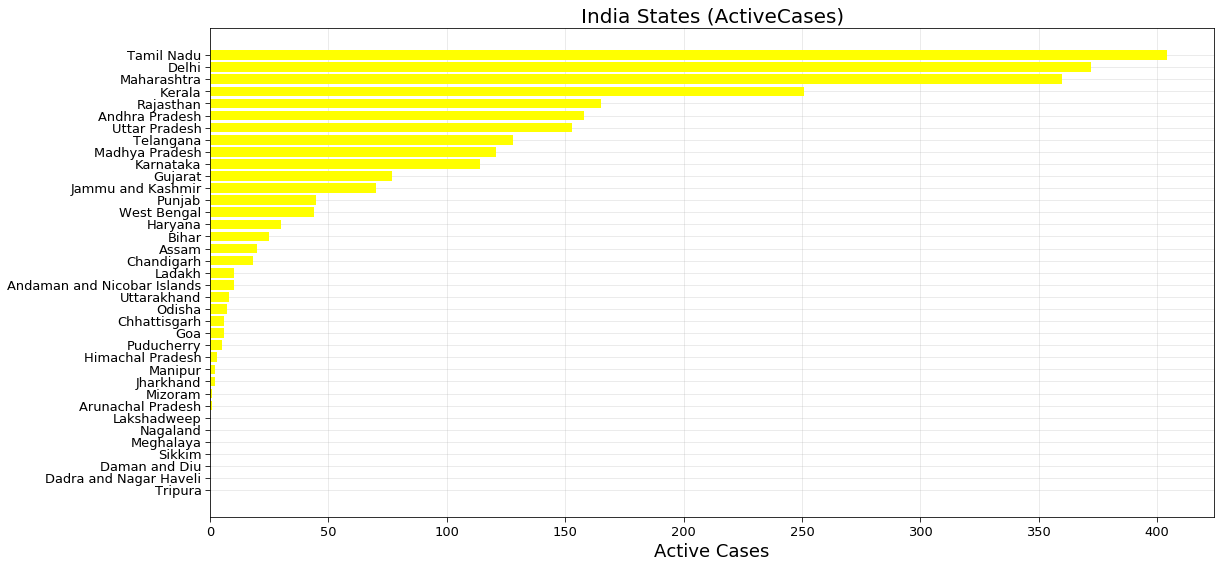

In [68]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('active')["active"].index[:],df_india.sort_values('active')["active"].values[:],color="yellow")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("India States (ActiveCases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Active Cases).png')

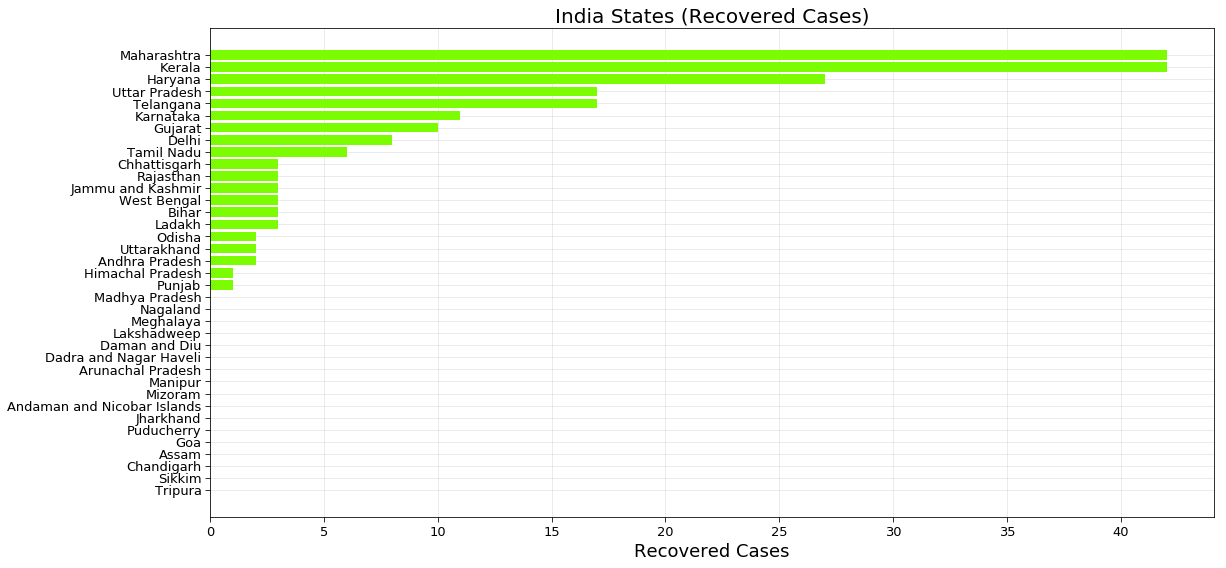

In [69]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('recovered')["recovered"].index[:],df_india.sort_values('recovered')["recovered"].values[:],color="lawngreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("India States (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Recovered Cases).png')

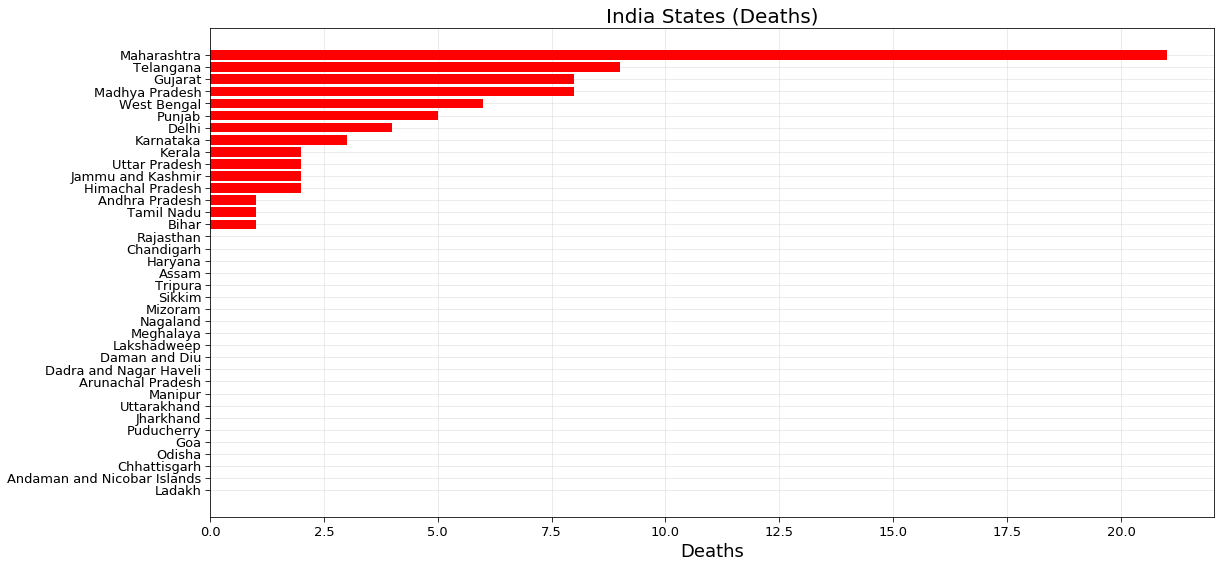

In [70]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('deaths')["deaths"].index[:],df_india.sort_values('deaths')["deaths"].values[:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("India States (Deaths)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Deaths).png')


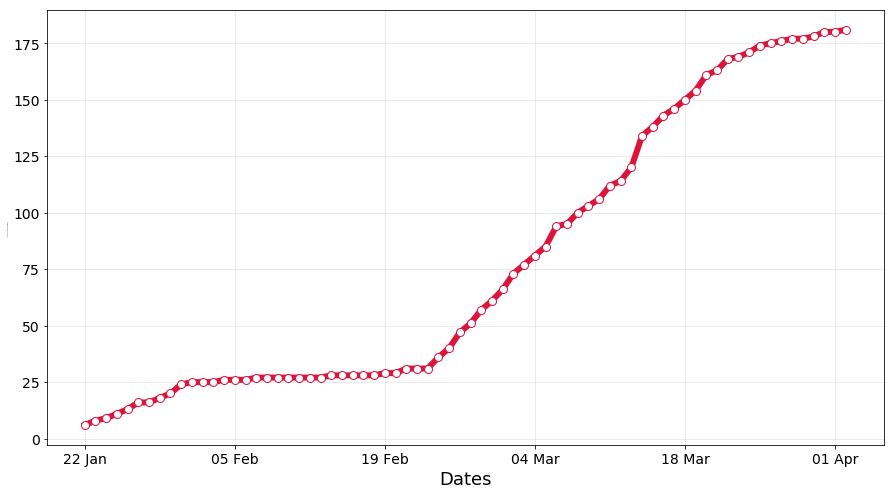

In [71]:
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)

plt.savefig('spread.png')
plt.show()
plt.close()

In [72]:
model = models.load_model('model_confirmed.h5')

In [73]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 81        
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                 0  

In [74]:
data_y = np.log10(np.asarray(df_confirmed.sum()[5:]).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

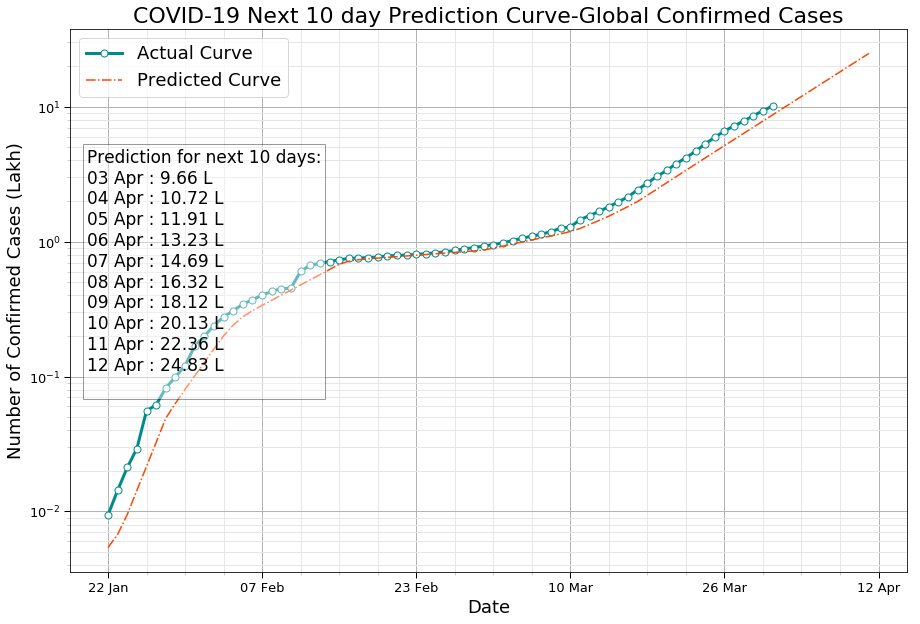

In [75]:
lakh = 100000
prediction_days = 10
data = np.power(10,model.predict(np.arange(1,len(data_y)+prediction_days+1)))
temp_data = df_confirmed.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/lakh,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/lakh,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases (Lakh)",fontsize =18)

plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig("Prediction Curve-Confirmed.png")
plt.show()
